# Preparations

## Importing required packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar

## Loading the data

In [5]:
df = pd.read_csv("/Users/sepid/desktop/learning/LearningPython/helloworld/JAPAN_EMSC.csv")
# df = pd.read_csv("JAPAN_EMSC.csv")

## Removing duplicate index column

In [8]:
df = df.drop(columns='Unnamed: 0')

## Making index to start from No.1

In [7]:
df = df.reset_index(drop=True)
df.index = range(1, len(df)+1)

## Shape

In [6]:
df.shape

(117, 8)

## Type of data 

In [9]:
df.dtypes

date_time_UTC       object
latitude_deg       float64
longitude_deg      float64
depth_km             int64
magnitude_value    float64
magnitude_type      object
region              object
dtype: object

## Converting data type of numerical columns to float 

In [10]:
df["depth_km"] = df["depth_km"].astype("float")

## Converting data type of date_time column to datetime

In [11]:
df["date_time_UTC"] = pd.to_datetime(df["date_time_UTC"], format="%Y-%m-%d %H:%M:%S")

In [12]:
df.dtypes

date_time_UTC      datetime64[ns]
latitude_deg              float64
longitude_deg             float64
depth_km                  float64
magnitude_value           float64
magnitude_type             object
region                     object
dtype: object

## Spotting NaN

In [13]:
df.isna().sum()

date_time_UTC      0
latitude_deg       0
longitude_deg      0
depth_km           0
magnitude_value    0
magnitude_type     0
region             0
dtype: int64

## Adding a new column: Month

In [14]:
df.insert(1, "Month", value= df["date_time_UTC"].apply(lambda x: calendar.month_name[x.month]))

## Adding a new column: Category

In [15]:
def filter(value):
    if value < 4:
        return "weak"
    elif 4 <= value <= 6:
        return "moderate"
    else:
        return "strong"
        
x = df["magnitude_value"].apply(filter)
df.insert(7, "Category", value = x)

## Changing the name of column 'region' to 'place'

In [16]:
df = df.rename(columns={"region":"place"})

## Defining a new column: Region

In [17]:
def f(x):
    x = x.split(",")
    return x[0]

df["region"] = df["place"].apply(lambda x:f(x))

# Analyzing

## Total & average number of earthquakes based on Month & Category

In [18]:
month_categ_stats = df.groupby(["Month","Category"]).agg(avg_magnitude=("magnitude_value", "mean"), earthquake_count=("magnitude_value", "count")).reset_index()
month_categ_stats["avg_magnitude"] = month_categ_stats["avg_magnitude"].round(2)
month_categ_stats.index = range(1, len(month_categ_stats)+1)
print(month_categ_stats)

       Month  Category  avg_magnitude  earthquake_count
1    October  moderate           4.59                23
2    October      weak           3.30                20
3  September  moderate           4.44                27
4  September      weak           3.21                47


## Grouping by data based on region & doing relevant analysis

### Count of earthquakes per region

In [19]:
print(df.groupby("region").size())

region
BONIN ISLANDS                       3
EASTERN HONSHU                      5
HOKKAIDO                            6
IZU ISLANDS                         3
KYUSHU                              6
NEAR EAST COAST OF HONSHU          25
NEAR S. COAST OF HONSHU             5
NEAR S. COAST OF WESTERN HONSHU     1
NEAR WEST COAST OF HONSHU           3
OFF EAST COAST OF HONSHU           14
RYUKYU ISLANDS                     33
SHIKOKU                             2
SOUTH KOREA                         6
SOUTHWESTERN RYUKYU ISL.            1
WESTERN HONSHU                      3
YELLOW SEA                          1
dtype: int64


### Average of magnitude and depth of earthquakes per region

In [20]:
print(df.groupby("region").agg({"magnitude_value":"mean", "depth_km":"mean"}).round(2))

                                 magnitude_value  depth_km
region                                                    
BONIN ISLANDS                               4.10    395.67
EASTERN HONSHU                              3.22     40.00
HOKKAIDO                                    3.80     64.17
IZU ISLANDS                                 4.47    249.00
KYUSHU                                      3.40     21.67
NEAR EAST COAST OF HONSHU                   4.08     51.92
NEAR S. COAST OF HONSHU                     3.70     54.00
NEAR S. COAST OF WESTERN HONSHU             3.00     10.00
NEAR WEST COAST OF HONSHU                   3.87     66.67
OFF EAST COAST OF HONSHU                    4.63      9.07
RYUKYU ISLANDS                              3.63     14.03
SHIKOKU                                     3.30     40.00
SOUTH KOREA                                 2.42     15.83
SOUTHWESTERN RYUKYU ISL.                    4.50     55.00
WESTERN HONSHU                              3.17     13.

### Maximum of magnitude and depth of earthquakes per region

In [21]:
print(df.groupby("region").agg({"magnitude_value":"max", "depth_km":"max"}).round(2))

                                 magnitude_value  depth_km
region                                                    
BONIN ISLANDS                                4.2     444.0
EASTERN HONSHU                               3.8      60.0
HOKKAIDO                                     4.3     130.0
IZU ISLANDS                                  4.8     437.0
KYUSHU                                       4.1      30.0
NEAR EAST COAST OF HONSHU                    6.0     100.0
NEAR S. COAST OF HONSHU                      4.5     110.0
NEAR S. COAST OF WESTERN HONSHU              3.0      10.0
NEAR WEST COAST OF HONSHU                    4.4     180.0
OFF EAST COAST OF HONSHU                     4.9      12.0
RYUKYU ISLANDS                               5.3     140.0
SHIKOKU                                      3.5      40.0
SOUTH KOREA                                  3.1      25.0
SOUTHWESTERN RYUKYU ISL.                     4.5      55.0
WESTERN HONSHU                               3.3      20

### Bar chart for count of earthquakes per region

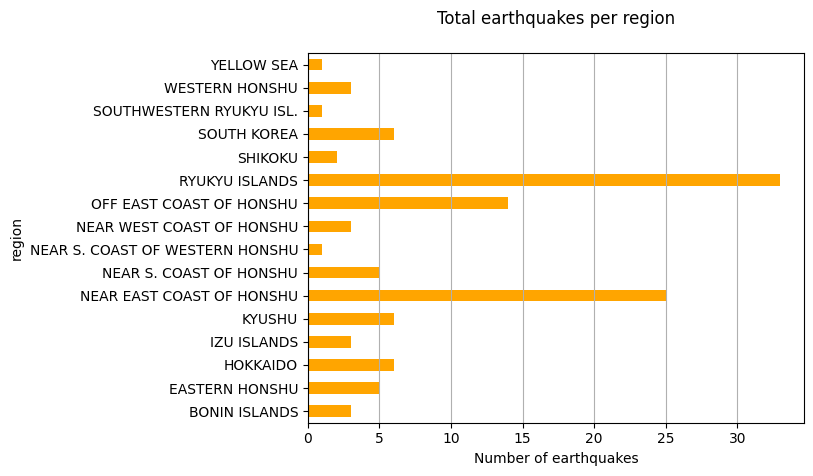

In [22]:
m = df.groupby("region").size()
region_plot = m.plot(kind="barh", color="orange")
region_plot.set_xlabel("Number of earthquakes")
# m.set_ylabel("Region")
region_plot.set_title("Total earthquakes per region\n")
# region_plot.grid(True)
region_plot.grid(axis='x')

# Exporting cleaned data 

In [23]:
df.to_csv('JAPAN_EMSC_cleaned.csv' , encoding='utf-8-sig')